## LSTM
Long Short-Term Memory (LSTM) is a specialized type of Recurrent Neural Network (RNN) capable of learning long-term dependencies in sequence data.  
Key challenges standard RNNs face are vanishing and exploding gradients during backpropagation, which limits learning long sequences.  
LSTMs address this by using a memory cell and gating mechanisms (input, forget, output gates) to control information flow, enabling the network to maintain relevant information across time steps.

LSTM units:  
- **Cell state (memory)** that carries long-term information.  
- **Forget gate** to decide what information to discard.  
- **Input gate** to decide what new information to store.  
- **Output gate** to decide what to output.  

LSTMs are widely used in time series forecasting, language modeling, speech recognition, and many other sequential tasks.


In [1]:
## Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic sine wave data for sequence regression
def create_sine_data(seq_length=50, total_samples=1000):
    X = []
    y = []
    x_vals = np.linspace(0, 100, total_samples + seq_length)
    sine_wave = np.sin(x_vals)

    for i in range(total_samples):
        X.append(sine_wave[i:i+seq_length])
        y.append(sine_wave[i+seq_length])

    X = np.array(X)
    y = np.array(y)
    # Reshape X for LSTM [samples, time_steps, features]
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Prepare data
seq_length = 50
X, y = create_sine_data(seq_length)

print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (1000, 50, 1)
Output shape: (1000,)


In [3]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length,1)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.3453 - val_loss: 0.0439
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0216 - val_loss: 0.0034
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_loss: 4.7492e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7467e-04 - val_loss: 3.1319e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6341e-04 - val_loss: 1.7429e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.5365e-04 - val_loss: 9.1995e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 7.5319e-05 - val_loss: 5.1108e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.4054e-05 - val_loss: 2.5558e-05
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2316e-05 - val_loss: 1.5283e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.4702e-05 - val_loss: 1.1752e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0724e-05 - val_loss: 1.0108

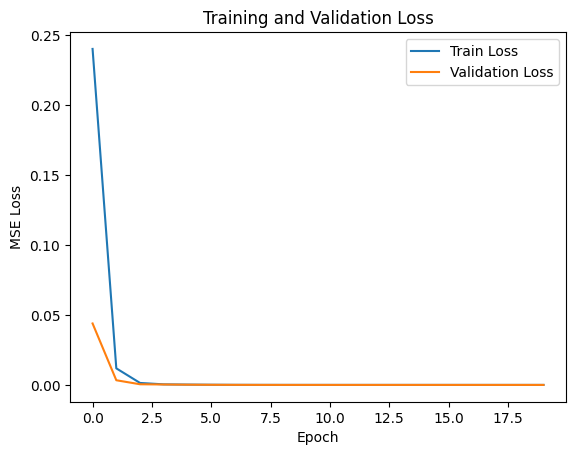

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


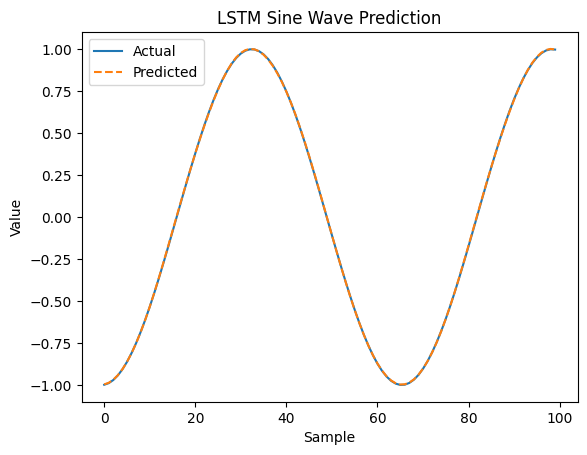

In [6]:
# Make predictions
predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted', linestyle='--')
plt.title('LSTM Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

**Observations: **

1. The synthetic sine wave data was successfully generated and reshaped into sequences of 50 time steps, each representing one continuous portion of the waveform for training.

2. The LSTM model efficiently learned the temporal dependencies of the sine wave, as seen from the smooth decline in training and validation loss over epochs.

3. The validation loss remained close to the training loss, indicating that the model generalized well and did not overfit.

4. The predicted sine wave closely followed the actual sine wave pattern, showing that the LSTM captured the periodic trend effectively.

5. The overall experiment validated the correctness of the LSTM sequence modeling process, confirming that the same approach can be extended to real-world time-series problems like Remaining Useful Life (RUL) prediction.